# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
        # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | nova sintra
Processing Record 12 of Set 1 | yemel'yanovo
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | palmer
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | mitu
Processing Record 20 of Set 1 | sandnessjoen
Processing Record 21 of Set 1 | papatowai
Processing Record

Processing Record 36 of Set 4 | hammerfest
Processing Record 37 of Set 4 | ashburton
Processing Record 38 of Set 4 | punta arenas
Processing Record 39 of Set 4 | gusinoozyorsk
Processing Record 40 of Set 4 | andergrove
Processing Record 41 of Set 4 | bodegraven
Processing Record 42 of Set 4 | hit
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | port mathurin
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | egilsstadir
Processing Record 47 of Set 4 | touros
Processing Record 48 of Set 4 | kyzyl
Processing Record 49 of Set 4 | north bend
Processing Record 0 of Set 5 | walvis bay
Processing Record 1 of Set 5 | haiku-pauwela
Processing Record 2 of Set 5 | shadrinsk
Processing Record 3 of Set 5 | ain taya
Processing Record 4 of Set 5 | ciudad tula
Processing Record 5 of Set 5 | prado
Processing Record 6 of Set 5 | sikandarpur
Processing Record 7 of Set 5 | avellaneda
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set

Processing Record 27 of Set 8 | tangalle
Processing Record 28 of Set 8 | mamuju
Processing Record 29 of Set 8 | dickinson
Processing Record 30 of Set 8 | okhotsk
Processing Record 31 of Set 8 | weining
Processing Record 32 of Set 8 | san andres
Processing Record 33 of Set 8 | del rio
Processing Record 34 of Set 8 | novoagansk
Processing Record 35 of Set 8 | vilyuchinsk
Processing Record 36 of Set 8 | sarupathar
Processing Record 37 of Set 8 | alamosa
Processing Record 38 of Set 8 | bereznik
Processing Record 39 of Set 8 | aktobe
Processing Record 40 of Set 8 | medicine hat
Processing Record 41 of Set 8 | malanje
Processing Record 42 of Set 8 | peace river
Processing Record 43 of Set 8 | ladismith
City not found. Skipping...
Processing Record 44 of Set 8 | dor marunt
Processing Record 45 of Set 8 | sinton
Processing Record 46 of Set 8 | greenville
Processing Record 47 of Set 8 | jieshou
Processing Record 48 of Set 8 | arraial do cabo
Processing Record 49 of Set 8 | mugia
Processing Reco

Processing Record 19 of Set 12 | bomdila
Processing Record 20 of Set 12 | labytnangi
Processing Record 21 of Set 12 | geraldton
Processing Record 22 of Set 12 | happy valley-goose bay
Processing Record 23 of Set 12 | ongjin
Processing Record 24 of Set 12 | sona
Processing Record 25 of Set 12 | salekhard
Processing Record 26 of Set 12 | nueve de julio
Processing Record 27 of Set 12 | ulsteinvik
Processing Record 28 of Set 12 | masina
Processing Record 29 of Set 12 | cannonvale
Processing Record 30 of Set 12 | kertih
Processing Record 31 of Set 12 | colonia
Processing Record 32 of Set 12 | lata
Processing Record 33 of Set 12 | muisne
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,3.20,95,75,0.00,GB,1701047383
1,udachny,66.4167,112.4000,-21.19,99,100,3.37,RU,1701047358
2,wailua homesteads,22.0669,-159.3780,26.24,87,75,7.20,US,1701047541
3,georgetown,5.4112,100.3354,26.96,89,20,1.03,MY,1701047264
4,dudinka,69.4058,86.1778,-27.34,100,68,2.24,RU,1701047543


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,3.20,95,75,0.00,GB,1701047383
1,udachny,66.4167,112.4000,-21.19,99,100,3.37,RU,1701047358
2,wailua homesteads,22.0669,-159.3780,26.24,87,75,7.20,US,1701047541
3,georgetown,5.4112,100.3354,26.96,89,20,1.03,MY,1701047264
4,dudinka,69.4058,86.1778,-27.34,100,68,2.24,RU,1701047543


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

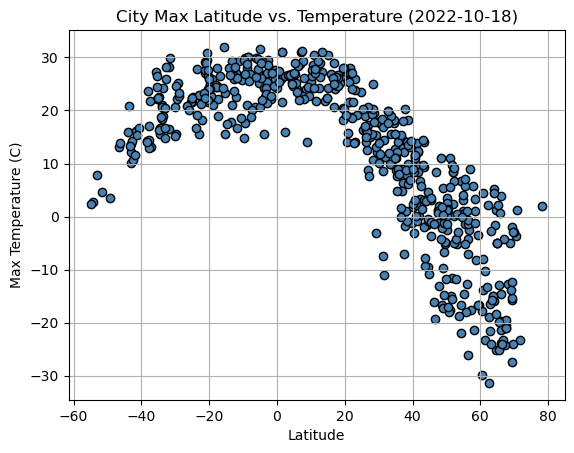

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker="o",facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

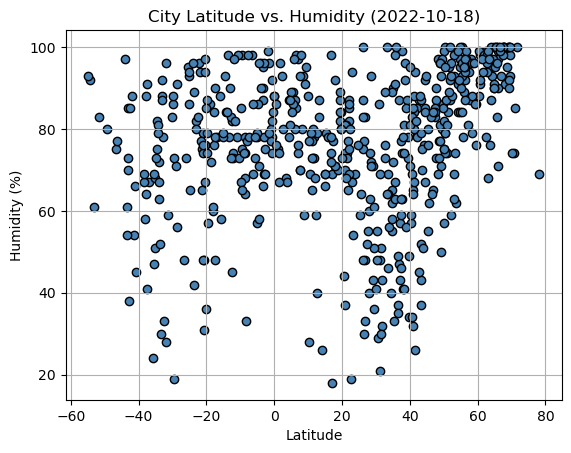

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker="o",facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

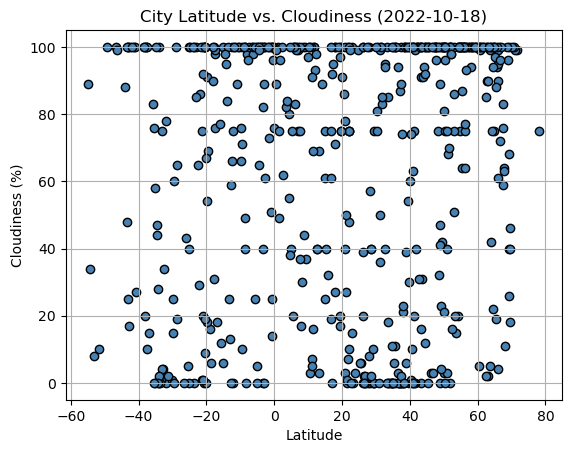

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker="o",facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

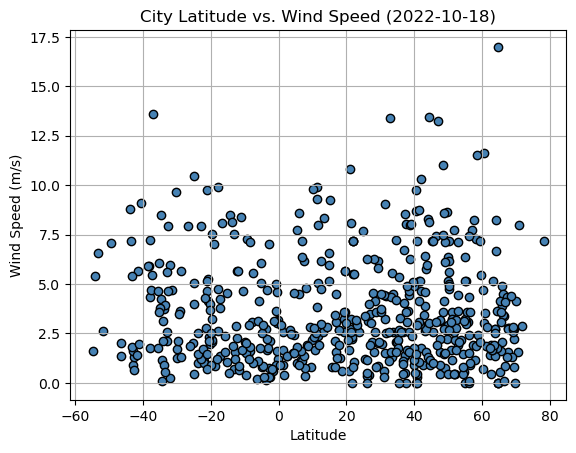

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker="o",facecolors="steelblue",edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def linear_regression_plots( x_values, y_values,x_label,y_label,coordinate=(10,-10)):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,3.20,95,75,0.00,GB,1701047383
1,udachny,66.4167,112.4000,-21.19,99,100,3.37,RU,1701047358
2,wailua homesteads,22.0669,-159.3780,26.24,87,75,7.20,US,1701047541
3,georgetown,5.4112,100.3354,26.96,89,20,1.03,MY,1701047264
4,dudinka,69.4058,86.1778,-27.34,100,68,2.24,RU,1701047543


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,puerto natales,-51.7236,-72.4875,4.60,83,10,2.61,CL,1701047543
6,edinburgh of the seven seas,-37.0676,-12.3116,13.04,67,15,13.61,SH,1701047544
7,afaahiti,-17.7500,-149.2833,27.93,84,100,9.90,PF,1701047544
8,grytviken,-54.2811,-36.5092,2.81,92,34,5.42,GS,1701047545
9,broken hill,-31.9500,141.4333,28.22,28,78,5.94,AU,1701047546


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7533707803157386


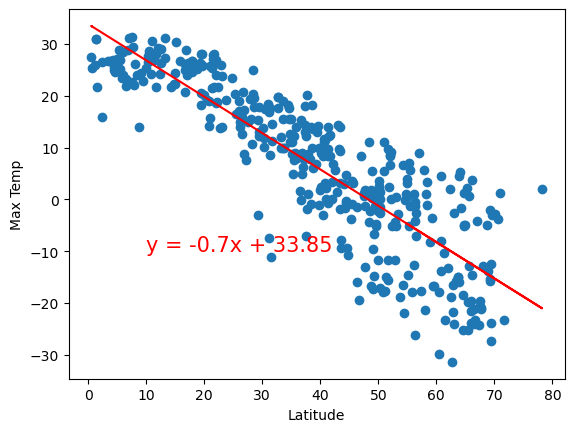

In [10]:
# Linear regression on Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],"Latitude","Max Temp")

The r-value is: 0.4371047211861586


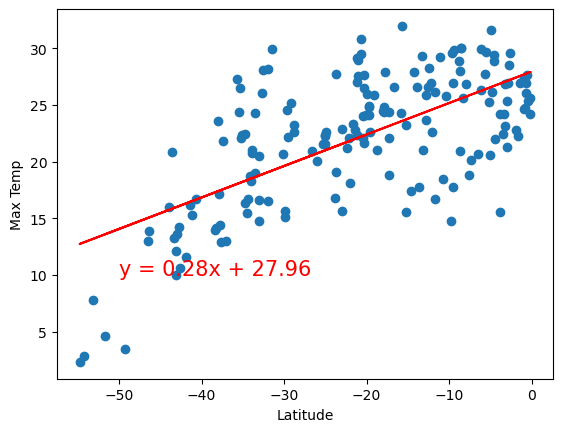

In [18]:
# Linear regression on Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Latitude","Max Temp",(-50,10))

**Discussion about the linear relationship:** There is a negative correlation with temperature and the increase in latitude and there is a positive correlation with a decrease in latitude and increase in temperature. The correlation between increased latitude and decreased temperature is much stronger in the Northern Hemisphere than the correlation between decreased latitude and increased temperature in the Southern Hemisphere. Based on this data, once the latitude of a city surpasses 0 then the temperature will most likely decrease by 10 degrees per every increase by 10 in latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11814454873574677


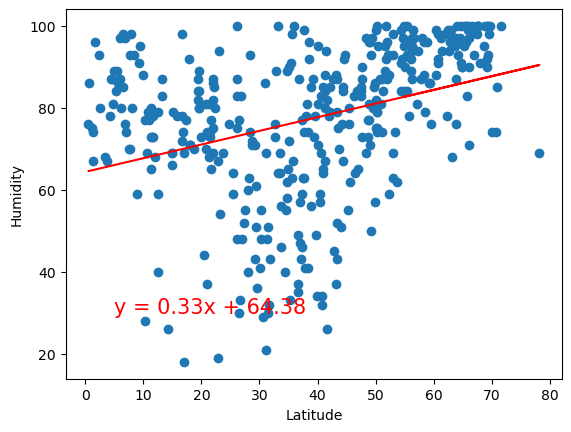

In [13]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],"Latitude","Humidity",(5,30))

The r-value is: 0.05435671256599571


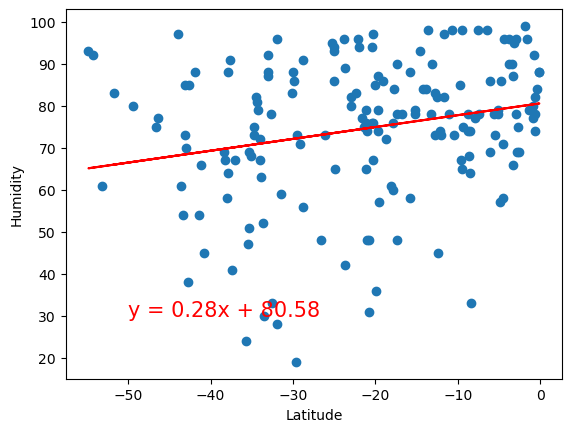

In [15]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Latitude","Humidity",(-50,30))

**Discussion about the linear relationship:** There is a very weak correlation between humidity and latitude in both the Northern and Southern Hemispheres. The correlations in both hemispheres are positive. Although the correlation is weak in both charts, the data clearly indicates that humidyt will gradually increase until it reaches 70, then humidity will gradually decrease as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02199767105933386


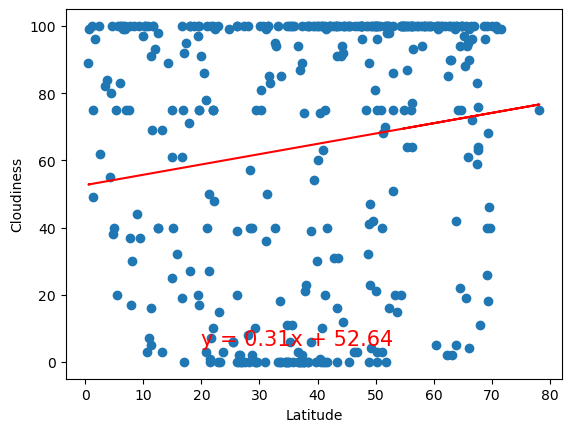

In [64]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],"Latitude","Cloudiness")

The r-value is: 0.0329661091338471


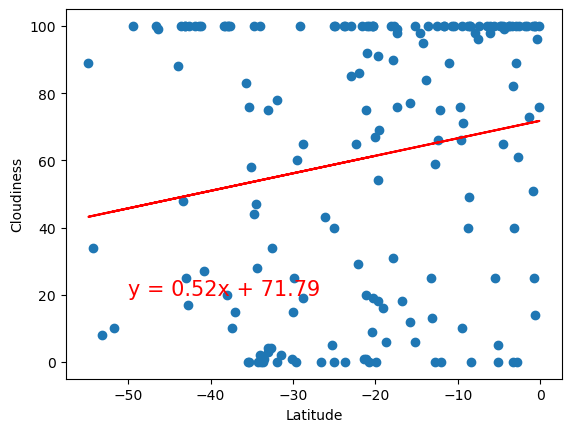

In [16]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Latitude","Cloudiness",(-50,20))

**Discussion about the linear relationship:** The correlation between latitude and cloudiness is weak in both the Northern and Southern Hemispheres. The correlations in both hemispheres are positive. In both hemispheres, cloudiness tends to cluster at 100 and that cluster tends to stay constant as latitude gradually increases until it surpasses 70 in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0002034424027372654


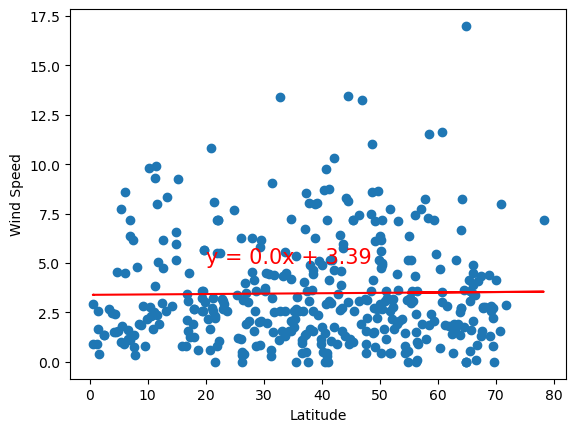

In [66]:
# Northern Hemisphere
linear_regression_plots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],"Latitude","Wind Speed")

The r-value is: 0.04518358260970889


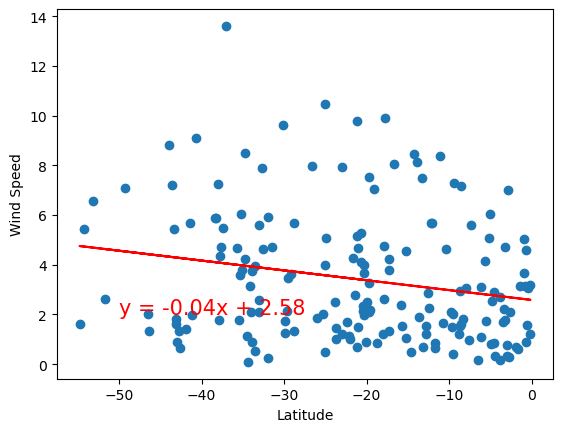

In [17]:
# Southern Hemisphere
linear_regression_plots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Latitude","Wind Speed",(-50,2))

**Discussion about the linear relationship:** In both the Nothern and Southern Hemispheres the correlation between latitude and windspeed is very weak. The correlation between the two variables in the Northern Hemisphere is positive and the correlation in the Southern Hemisphere is negative. Based on this data, the majority of wind speeds are likely to stay below 5 in the cities randomly selected for this analysis.